## ニューラルネットワークの学習

NNの学習とは、重みとバイアスを訓練データに適応させるように調整する、「教師あり学習」である。  

NNの学習は、何を指標として、どのように適応させるのか。  
- 指標 = 損失関数（二乗和誤差、クロスエントロピー誤差、など）
- 適応 = 最適化問題（最急降下法、確率的勾配降下法、焼きなまし法、など）  
  この辺りがイジングモデルを計算する[D-wave](https://www.dwavesys.com/home)とかに関わってくるのかな^^  
  爆速で学習するみたいな。最適化問題は計算負荷がめちゃくちゃ高そう。  

用語：
- **損失関数**   
  学習が悪いということを評価する指標。 **微分できることが重要**  
  学習に使う全ての訓練データとNNの出力の比較を行ってそれらの和をとるので、データ量が多い場合は現実的でなくなる。    
  そのため、ミニバッチ学習という手法を使う。 
- **最適化問題 **  
  エネルギー最小化問題ともいうらすぃ。  
  球を坂の上に置くと、位置エネルギーが運動エネルギーになって転がっていくが、安定する位置で止まる。  
  このように損失関数という坂道を安定状態(=微分した値が0)に持っていく。
- **クロスエントロピー誤差**  
  ソフトマックスと組み合わせて分類問題で使われるっぽい  
  確率が低いほど必要な情報量が多い、つまりソフトマックスの結果の出力値が小さいほどクロスエントロピー誤差の値が大きくなる  
  [クロスエントロピーについてわかりやすい記事](http://nihaoshijie.hatenadiary.jp/entry/2017/04/26/062304) 

## NNの学習手順

1. **ミニバッチ**  
  訓練データの中から一部のデータを無作為抽出し、それらのデータをミニバッチという。  
   
2. **勾配算出**  
  ミニバッチの損失関数の坂を下るために勾配を求める
  
3. **パラメータ更新**  
  重みパラメータを勾配方向に微小量更新する

4. **繰り返し**  
  上記を繰り返す

## 3層NNの実装

図ch004-1:3層ニューラルネットワーク  
(バイアスは図字されていない)

<img border="0" src="./images/neural_network_3layer.png" width="512" height="512" alt="イラスト1">

In [1]:
# import 教材のcommonライブラリを使わせて頂く 、教材では二層NNを実装している networks/two_layer_net.py参照
# 以下と同じコードをnetworks/three_layer_net.pyとして格納している
import numpy as np
import sys, os
sys.path.append(os.pardir)
from common.functions import *
from common.gradient import numerical_gradient

class ThreeLayerNet:
    # 初期化関数 NNのパラメータの初期値設定を行う
    def __init__(self, size = {'in': 10, 'hidden1': 10, 'hidden2': 10, 'out': 10},
                 weight_init_std=0.01, experiment={'init_param': False, 'func': False}):
        self.params = {}
        self.experiment = experiment
        # 重みの初期化
        # experiment[0]がTrueの時に、重みの初期値を全てゼロにする
        # paramsはNNの重みとバイアスを保持するインスタンス変数
        if self.experiment['init_param'] == False:
            self.params['W1'] = weight_init_std * np.random.randn(size['in'], size['hidden1'])
            self.params['b1'] = np.zeros(size['hidden1'])
            self.params['W2'] = weight_init_std * np.random.randn(size['hidden1'], size['hidden2'])
            self.params['b2'] = np.zeros(size['hidden2'])
            self.params['W3'] = weight_init_std * np.random.randn(size['hidden2'], size['out'])
            self.params['b3'] = np.zeros(size['out'])
        else:
            self.params['W1'] = weight_init_std * np.zeros((size['in'], size['hidden1']))
            self.params['b1'] = np.zeros(size['hidden1'])
            self.params['W2'] = weight_init_std * np.zeros((size['hidden1'], size['hidden2']))
            self.params['b2'] = np.zeros(size['hidden2'])
            self.params['W3'] = weight_init_std * np.zeros((size['hidden2'], size['out']))
            self.params['b3'] = np.zeros(size['out'])
    
    # 推論を行う
    def predict(self, input_data):
        W1, W2, W3 = self.params['W1'], self.params['W2'], self.params['W3']
        b1, b2, b3 = self.params['b1'], self.params['b2'], self.params['b3']
        
        a1 = np.dot(input_data, W1) + b1
        if self.experiment['func'] == False:
            z1=sigmoid(a1)
        else:
            z1=a1
        a2 = np.dot(z1, W2) + b2
        if self.experiment['func'] == False:
            z2=sigmoid(a2)
        else:
            z2=a2
        a3 = np.dot(z2, W3) + b3
        output_data = softmax(a3)
        
        return output_data
    
    # 損失関数の値を求める
    def loss(self, x, t):
        y = self.predict(x)
        
        return cross_entropy_error(y, t)
    
    # 認識精度
    def accuracy(self, x, t):
        y = self.predict(x)
        # argmaxは配列内の最大要素の位置を返す
        y = np.argmax(y, axis=1)
        t = np.argmax(t, axis=1)
        
        accuracy = np.sum(y == t) / float(x.shape[0])
        return accuracy
    
    # 重みパラメータに対する勾配を求める
    def numerical_gradient(self, x, t):
        loss_W = lambda W: self.loss(x, t)
            
        grads = {}
        grads['W1'] = numerical_gradient(loss_W, self.params['W1'])
        grads['b1'] = numerical_gradient(loss_W, self.params['b1'])
        grads['W2'] = numerical_gradient(loss_W, self.params['W2'])
        grads['b2'] = numerical_gradient(loss_W, self.params['b2'])
        grads['W3'] = numerical_gradient(loss_W, self.params['W3'])
        grads['b3'] = numerical_gradient(loss_W, self.params['b3'])
        
        return grads
    
    # 高速化版　次の章の内容含む
    def gradient(self, x, t):
        W1, W2, W3 = self.params['W1'], self.params['W2'], self.params['W3']
        b1, b2, b3 = self.params['b1'], self.params['b2'], self.params['b3']
        grads = {}
        
        batch_num = x.shape[0]
        
        # forward
        a1 = np.dot(x, W1) + b1
        if self.experiment['func'] == False:
            z1=sigmoid(a1)
        else:
            z1=a1
        a2 = np.dot(z1, W2) + b2
        if self.experiment['func'] == False:
            z2=sigmoid(a2)
        else:
            z2=a2
        a3 = np.dot(z2, W3) + b3
        y = softmax(a3)
        
        # backward
        dy = (y - t) / batch_num
        
        grads['W3'] = np.dot(z2.T, dy)
        grads['b3'] = np.sum(dy, axis=0)
      
        dz2 = np.dot(dy, W3.T)
        da2 = sigmoid_grad(a2) * dz2
        grads['W2'] = np.dot(z1.T, da2)
        grads['b2'] = np.sum(da2, axis=0)
        
        dz1 = np.dot(da2, W2.T)
        da1 = sigmoid_grad(a1) * dz1
        grads['W1'] = np.dot(x.T, da1)
        grads['b1'] = np.sum(da1, axis=0)

        return grads

## MNISTデータセット

数字画像のデータセットで訓練画像とテスト画像を利用して学習と推論を実施出来る。  
ちょろっと調べた所、[keras](https://keras.io/ja/)というライブラリでMNISTを手軽に使えるらスィ。  
ここは本と少し違うやり方でMNISTを読み込んでいる。

In [2]:
from keras.datasets import mnist
from keras.utils.np_utils import to_categorical
(x_train, t_train), (x_test, t_test) = mnist.load_data()

x_train = x_train.reshape(60000, 784) / 255.0
x_test = x_test.reshape(10000, 784) / 255.0

# encoding
t_train = to_categorical(t_train, 10)
t_test =  to_categorical(t_test, 10)

print(x_train.shape) # 学習用画像データ
print(t_train.shape) # 学習用画像データのラベル
print(x_test.shape)  # テスト用画像データ
print(t_test.shape)  # テスト用画像データのラベル

# 画像を表示してみる Pillowというライブラリを使って配列から画像に変換する
# pip install pillowで入れる
from PIL import Image

def img_show(img):
    pil_img = Image.fromarray(np.uint8(img))
    pil_img.show()

Using TensorFlow backend.


(60000, 784)
(60000, 10)
(10000, 784)
(10000, 10)


## ミニバッチ学習

訓練データから無作為に一部のデータを取り出したものをミニバッチという。
ミニバッチに対して学習を行う。

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from network.two_layer_net import TwoLayerNet

class TrainNeuralNet:
    
    def __init__(self, iteration=10000, train_size=60000, batch_size=100, learning_rate=0.1, 
                 size={'in': 784, 'hidden1': 50, 'hidden2': 100, 'out': 10}, 
                 experiment={'init_param': False, 'func': False, 'layer': False}, 
                 x_train=[], t_train=[], x_test=[], t_test=[]):
        train_loss_list = []
        train_acc_list = []
        test_acc_list = []
        # 1エポック辺りの繰り返し数
        iter_per_epoch = max(train_size / batch_size, 1)
        
        if experiment['layer'] == False:
            network = ThreeLayerNet(size=size, experiment=experiment)
            keys = ['W1', 'b1', 'W2', 'b2', 'W3', 'b3']
        else:
            network = TwoLayerNet(input_size=size['in'], hidden_size=size['hidden1'], output_size=size['out'])
            keys = ['W1', 'b1', 'W2', 'b2']
            
        for i in range(iteration):
            # ミニバッチ取得
            batch_mask = np.random.choice(train_size, batch_size)
            x_batch = x_train[batch_mask]
            t_batch = t_train[batch_mask]

            # 勾配計算
            # grad = network.numerical_gradient(x_batch, t_batch)
            grad = network.gradient(x_batch, t_batch)
            
            # パラメータ更新
            for key in keys:
                network.params[key] -= learning_rate * grad[key]
            
            loss = network.loss(x_batch, t_batch)
            train_loss_list.append(loss)
            
            # 1エポックごとに認識率を計算
            if i % iter_per_epoch == 0:
                train_acc = network.accuracy(x_train, t_train)
                test_acc = network.accuracy(x_test, t_test)
                train_acc_list.append(train_acc)
                test_acc_list.append(test_acc)
                print("train acc, test acc | " + str(train_acc) + ", " + str(test_acc))
                
        # グラフの描画
        markers = {'train': 'o', 'test': 's'}
        x = np.arange(len(train_acc_list))
        plt.plot(x, train_acc_list, label='train acc')
        plt.plot(x, test_acc_list, label='test acc', linestyle='--')
        plt.xlabel("epochs")
        plt.ylabel("accuracy")
        plt.ylim(0, 1.0)
        plt.legend(loc='lower right')
        plt.show()
             

train acc, test acc | 0.11236666666666667, 0.1135
train acc, test acc | 0.7853166666666667, 0.7899
train acc, test acc | 0.87275, 0.8767
train acc, test acc | 0.8966166666666666, 0.9009
train acc, test acc | 0.907, 0.9097
train acc, test acc | 0.9143333333333333, 0.9165
train acc, test acc | 0.9193166666666667, 0.9207
train acc, test acc | 0.9243833333333333, 0.9246
train acc, test acc | 0.9282833333333333, 0.9309
train acc, test acc | 0.9313666666666667, 0.9333
train acc, test acc | 0.9344, 0.9347
train acc, test acc | 0.9371, 0.9378
train acc, test acc | 0.9398, 0.9404
train acc, test acc | 0.9417166666666666, 0.9418
train acc, test acc | 0.9441166666666667, 0.9442
train acc, test acc | 0.9457333333333333, 0.9451
train acc, test acc | 0.9474333333333333, 0.9466


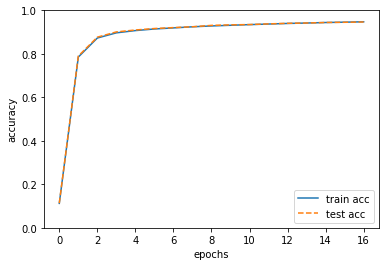

In [4]:
# 2層NN default
# 認識精度 0.9467166666666667
TrainNeuralNet(x_train=x_train, t_train=t_train, x_test=x_test, t_test=t_test, experiment={'layer': True})

train acc, test acc | 0.09863333333333334, 0.0958
train acc, test acc | 0.09751666666666667, 0.0974
train acc, test acc | 0.11236666666666667, 0.1135
train acc, test acc | 0.11236666666666667, 0.1135
train acc, test acc | 0.11236666666666667, 0.1135
train acc, test acc | 0.11236666666666667, 0.1135
train acc, test acc | 0.1155, 0.1168
train acc, test acc | 0.3382833333333333, 0.3414
train acc, test acc | 0.5497, 0.553
train acc, test acc | 0.6496333333333333, 0.6519
train acc, test acc | 0.7394833333333334, 0.7434
train acc, test acc | 0.82045, 0.8236
train acc, test acc | 0.8562666666666666, 0.8602
train acc, test acc | 0.8743, 0.8772
train acc, test acc | 0.8858, 0.8874
train acc, test acc | 0.8949166666666667, 0.8965
train acc, test acc | 0.9044, 0.9032


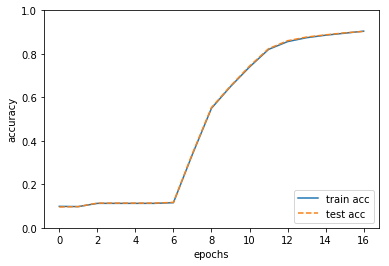

In [5]:
# 3層NN default
# 認識精度 0.9066833333333333
TrainNeuralNet(x_train=x_train, t_train=t_train, x_test=x_test, t_test=t_test )

train acc, test acc | 0.10218333333333333, 0.101
train acc, test acc | 0.11236666666666667, 0.1135
train acc, test acc | 0.09751666666666667, 0.0974
train acc, test acc | 0.11236666666666667, 0.1135
train acc, test acc | 0.10218333333333333, 0.101
train acc, test acc | 0.11236666666666667, 0.1135
train acc, test acc | 0.09736666666666667, 0.0982
train acc, test acc | 0.09915, 0.1009
train acc, test acc | 0.10218333333333333, 0.101
train acc, test acc | 0.11236666666666667, 0.1135
train acc, test acc | 0.2590166666666667, 0.2598
train acc, test acc | 0.2986333333333333, 0.305
train acc, test acc | 0.31445, 0.3215
train acc, test acc | 0.32565, 0.3302
train acc, test acc | 0.33631666666666665, 0.3399
train acc, test acc | 0.3431, 0.3452
train acc, test acc | 0.34446666666666664, 0.3439


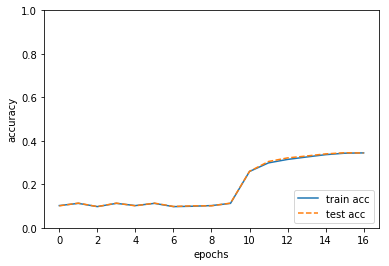

In [6]:
# 3層NN 重みの初期値をゼロにしてみる
# 認識精度 0.3489833333333333
# 次章で説明するが、重みの初期値を均一にしてしまうと学習がうまく行かない
experiment={'init_param': True, 'layer': False, 'func': False}
TrainNeuralNet(x_train=x_train, t_train=t_train, x_test=x_test, t_test=t_test, experiment=experiment)

train acc, test acc | 0.09863333333333334, 0.0958
train acc, test acc | 0.21133333333333335, 0.2135
train acc, test acc | 0.7293166666666666, 0.738
train acc, test acc | 0.8285333333333333, 0.831
train acc, test acc | 0.85805, 0.8566
train acc, test acc | 0.8794, 0.8783
train acc, test acc | 0.8882, 0.8874
train acc, test acc | 0.8938666666666667, 0.8905
train acc, test acc | 0.8987666666666667, 0.8981
train acc, test acc | 0.9030833333333333, 0.903
train acc, test acc | 0.9057666666666667, 0.9039
train acc, test acc | 0.9068166666666667, 0.9083
train acc, test acc | 0.90895, 0.9081
train acc, test acc | 0.91115, 0.9105
train acc, test acc | 0.9119833333333334, 0.9106
train acc, test acc | 0.9119166666666667, 0.9111
train acc, test acc | 0.9158333333333334, 0.9122


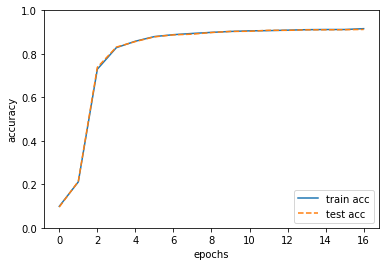

In [7]:
# 3層NN シグモイド関数を適用しない
# 認識精度 0.9140166666666667
experiment={'init_param': False, 'layer': False, 'func': True}
TrainNeuralNet(x_train=x_train, t_train=t_train, x_test=x_test, t_test=t_test, experiment=experiment)

train acc, test acc | 0.09871666666666666, 0.098
train acc, test acc | 0.5139833333333333, 0.5107
train acc, test acc | 0.8931333333333333, 0.8954
train acc, test acc | 0.9315, 0.9323
train acc, test acc | 0.9507333333333333, 0.9485
train acc, test acc | 0.9602666666666667, 0.9547
train acc, test acc | 0.9655666666666667, 0.9599
train acc, test acc | 0.9688333333333333, 0.9607
train acc, test acc | 0.9749666666666666, 0.9653
train acc, test acc | 0.9751166666666666, 0.9646
train acc, test acc | 0.977, 0.9661
train acc, test acc | 0.9809166666666667, 0.9702
train acc, test acc | 0.9825, 0.9699
train acc, test acc | 0.9824666666666667, 0.9681
train acc, test acc | 0.9838, 0.9706
train acc, test acc | 0.98515, 0.971
train acc, test acc | 0.9836, 0.9682


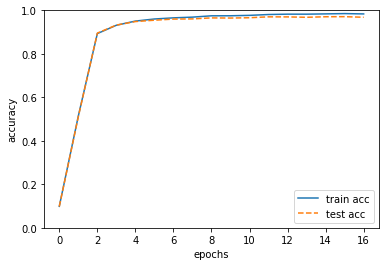

In [8]:
# 3層NN 学習率=1
# 認識精度 0.9876333333333334
# 若干過学習
TrainNeuralNet(x_train=x_train, t_train=t_train, x_test=x_test, t_test=t_test, learning_rate=1)

train acc, test acc | 0.09863333333333334, 0.0958
train acc, test acc | 0.10441666666666667, 0.1028
train acc, test acc | 0.10441666666666667, 0.1028
train acc, test acc | 0.1141, 0.1156
train acc, test acc | 0.3122, 0.3208
train acc, test acc | 0.5555333333333333, 0.5562
train acc, test acc | 0.7223, 0.7262
train acc, test acc | 0.7841, 0.7872
train acc, test acc | 0.8280666666666666, 0.8301
train acc, test acc | 0.8497333333333333, 0.8483
train acc, test acc | 0.86365, 0.8646
train acc, test acc | 0.8737333333333334, 0.8736
train acc, test acc | 0.8840333333333333, 0.8838
train acc, test acc | 0.89585, 0.8961
train acc, test acc | 0.9042, 0.9041
train acc, test acc | 0.9105333333333333, 0.9103
train acc, test acc | 0.9152166666666667, 0.9167


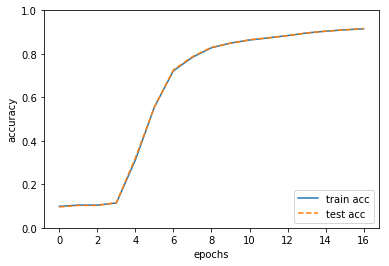

In [9]:
# 3層NN 隠れ層のサイズ変更
# 認識精度 0.9157833333333333
size={'in': 784, 'hidden1': 200, 'hidden2': 200, 'out': 10}
TrainNeuralNet(x_train=x_train, t_train=t_train, x_test=x_test, t_test=t_test, size=size)

train acc, test acc | 0.09035, 0.0892
train acc, test acc | 0.38506666666666667, 0.3872
train acc, test acc | 0.86065, 0.8646
train acc, test acc | 0.91595, 0.9164
train acc, test acc | 0.9450166666666666, 0.943
train acc, test acc | 0.9575333333333333, 0.9542
train acc, test acc | 0.9578666666666666, 0.9508
train acc, test acc | 0.968, 0.9623
train acc, test acc | 0.971, 0.9629
train acc, test acc | 0.9779333333333333, 0.971
train acc, test acc | 0.9791333333333333, 0.9707
train acc, test acc | 0.9818666666666667, 0.9733
train acc, test acc | 0.985, 0.9736
train acc, test acc | 0.9865, 0.9752
train acc, test acc | 0.9870666666666666, 0.975
train acc, test acc | 0.98745, 0.9765
train acc, test acc | 0.9918, 0.9778


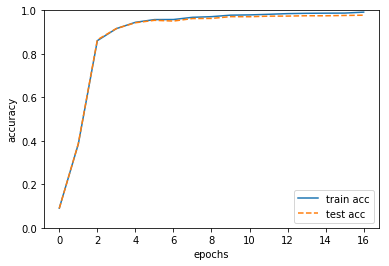

In [10]:
# 3層NN 隠れ層のサイズ変更+学習率=1
# 認識精度 0.9882333333333333
size={'in': 784, 'hidden1': 200, 'hidden2': 200, 'out': 10}
TrainNeuralNet(x_train=x_train, t_train=t_train, x_test=x_test, t_test=t_test, size=size, learning_rate=1)

train acc, test acc | 0.09736666666666667, 0.0982
train acc, test acc | 0.9237, 0.9208
train acc, test acc | 0.9366833333333333, 0.9295
train acc, test acc | 0.96885, 0.9597
train acc, test acc | 0.9739333333333333, 0.9638
train acc, test acc | 0.9824166666666667, 0.9732
train acc, test acc | 0.9844666666666667, 0.9728
train acc, test acc | 0.9846833333333334, 0.9705
train acc, test acc | 0.9873333333333333, 0.974
train acc, test acc | 0.9897833333333333, 0.9728
train acc, test acc | 0.9911166666666666, 0.9763
train acc, test acc | 0.9896833333333334, 0.976
train acc, test acc | 0.9911333333333333, 0.9743
train acc, test acc | 0.9962666666666666, 0.9787
train acc, test acc | 0.9946833333333334, 0.9761
train acc, test acc | 0.9966, 0.979
train acc, test acc | 0.9971666666666666, 0.979


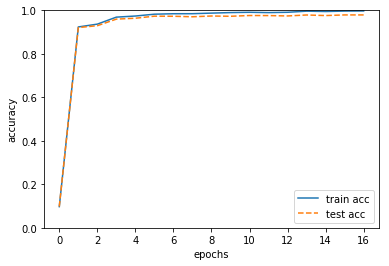

In [11]:
# 3層NN 隠れ層のサイズ変更+学習率=1
# 認識精度 0.9967666666666667
size={'in': 784, 'hidden1': 200, 'hidden2': 200, 'out': 10}
TrainNeuralNet(x_train=x_train, t_train=t_train, x_test=x_test, t_test=t_test, size=size, learning_rate=5)

train acc, test acc | 0.0993, 0.1032
train acc, test acc | 0.37041666666666667, 0.3747
train acc, test acc | 0.8669333333333333, 0.8656
train acc, test acc | 0.9131666666666667, 0.9105
train acc, test acc | 0.9337666666666666, 0.9336
train acc, test acc | 0.9502, 0.9457
train acc, test acc | 0.9593833333333334, 0.9545
train acc, test acc | 0.9683666666666667, 0.9608
train acc, test acc | 0.9707833333333333, 0.9638
train acc, test acc | 0.9772, 0.968
train acc, test acc | 0.9756, 0.9673
train acc, test acc | 0.9775333333333334, 0.9688
train acc, test acc | 0.9842, 0.9723
train acc, test acc | 0.985, 0.9716
train acc, test acc | 0.9884833333333334, 0.9774
train acc, test acc | 0.9894833333333334, 0.9778
train acc, test acc | 0.9881166666666666, 0.9751


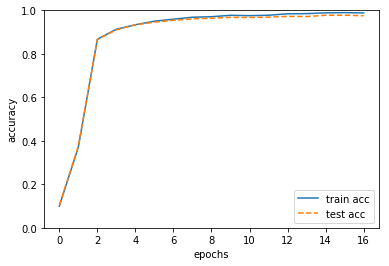

In [12]:
# 3層NN シグモイド関数なし+学習率=1
# 認識精度 0.9907166666666667
experiment={'init_param': False, 'layer': False, 'func': True}
TrainNeuralNet(x_train=x_train, t_train=t_train, x_test=x_test, t_test=t_test, size=size, learning_rate=1)

## 考察（謎だらけ^^）

学習率が高いほど認識精度が良く見えているが、訓練データとテストデータの認識精度に乖離がある。  
学習率が高いと早く収束するが安定しなさそう。後の章で学習率を動的に変える仕組みがあるのでそこで学ぶとする。

シグモイド関数を適用しない場合はむしろ認識率が良くなっているがなんで？  
そもそも活性化関数はなんでいるんだっけ？  
自分の理解では単純パーセプトロンの組み合わせで非線形問題は解けるはず・・  

活性化関数がない場合は、  
predictの計算結果を2値分類できないから、  
各事象の確率をそれぞれのニューロンが持たないといけなくなるので、  
2値の分類をするのに2ニューロン必要になる？
活性化関数を適用することで確率を1ニューロンで表現できる？  
必ずしも活性化関数がないと学習が出来ないわけではなさそう。 -> ファジー理論？
（今後、深く学ぶ）

一層しかない単純パーセプトロン相当だと認識率はどうなるんだろうか。  
⬇︎やってみる。上のコードはもう変えたくないので冗長だが書き直す。

In [13]:
# 隠れそうなしでやってみる。
import numpy as np
import sys, os
sys.path.append(os.pardir)
from common.functions import *
from common.gradient import numerical_gradient

class OneLayerNet:
    # 初期化関数 NNのパラメータの初期値設定を行う
    def __init__(self, size = {'in': 784, 'out': 10},
                 weight_init_std=0.01):
        self.params = {}
        self.experiment = experiment
        self.params['W'] = weight_init_std * np.random.randn(size['in'], size['out'])
        self.params['b'] = np.zeros(size['out'])

    # 推論を行う
    def predict(self, input_data):
        W = self.params['W']
        b = self.params['b']
        
        a = np.dot(input_data, W) + b
        output_data=softmax(a)
        
        return output_data
    
    # 損失関数の値を求める
    def loss(self, x, t):
        y = self.predict(x)
        
        return cross_entropy_error(y, t)
    
    # 認識精度
    def accuracy(self, x, t):
        y = self.predict(x)
        # argmaxは配列内の最大要素の位置を返す
        y = np.argmax(y, axis=1)
        t = np.argmax(t, axis=1)
        
        accuracy = np.sum(y == t) / float(x.shape[0])
        return accuracy
    
    # 重みパラメータに対する勾配を求める
    def numerical_gradient(self, x, t):
        loss_W = lambda W: self.loss(x, t)
            
        grads = {}
        grads['W'] = numerical_gradient(loss_W, self.params['W'])
        grads['b'] = numerical_gradient(loss_W, self.params['b'])
        
        return grads
    
    # 高速化版　次の章の内容含む
    def gradient(self, x, t):
        W = self.params['W']
        b = self.params['b']
        grads = {}
        
        batch_num = x.shape[0]
        
        # forward
        a = np.dot(x, W) + b
        y = softmax(a)
        
        # backward
        dy = (y - t) / batch_num
        
        grads['W'] = np.dot(x.T, dy)
        grads['b'] = np.sum(dy, axis=0)

        return grads

In [14]:
import numpy as np
import matplotlib.pyplot as plt

class TrainNeuralNet:
    
    def __init__(self, iteration=10000, train_size=60000, batch_size=100, learning_rate=0.1, 
                 size={'in': 784, 'out': 10}, 
                 experiment={'init_param': False, 'func': False, 'layer': False}, 
                 x_train=[], t_train=[], x_test=[], t_test=[]):
        train_loss_list = []
        train_acc_list = []
        test_acc_list = []
        # 1エポック辺りの繰り返し数
        iter_per_epoch = max(train_size / batch_size, 1)
        

        network = OneLayerNet(size=size)
        keys = ['W', 'b']
            
        for i in range(iteration):
            # ミニバッチ取得
            batch_mask = np.random.choice(train_size, batch_size)
            x_batch = x_train[batch_mask]
            t_batch = t_train[batch_mask]

            # 勾配計算
            # grad = network.numerical_gradient(x_batch, t_batch)
            grad = network.gradient(x_batch, t_batch)
            
            # パラメータ更新
            for key in keys:
                network.params[key] -= learning_rate * grad[key]
            
            loss = network.loss(x_batch, t_batch)
            train_loss_list.append(loss)
            
            # 1エポックごとに認識率を計算
            if i % iter_per_epoch == 0:
                train_acc = network.accuracy(x_train, t_train)
                test_acc = network.accuracy(x_test, t_test)
                train_acc_list.append(train_acc)
                test_acc_list.append(test_acc)
                print("train acc, test acc | " + str(train_acc) + ", " + str(test_acc))
                
        # グラフの描画
        markers = {'train': 'o', 'test': 's'}
        x = np.arange(len(train_acc_list))
        plt.plot(x, train_acc_list, label='train acc')
        plt.plot(x, test_acc_list, label='test acc', linestyle='--')
        plt.xlabel("epochs")
        plt.ylabel("accuracy")
        plt.ylim(0, 1.0)
        plt.legend(loc='lower right')
        plt.show()
             

train acc, test acc | 0.27366666666666667, 0.2682
train acc, test acc | 0.8957166666666667, 0.9033
train acc, test acc | 0.9047, 0.9103
train acc, test acc | 0.9105333333333333, 0.9151
train acc, test acc | 0.9136833333333333, 0.9158
train acc, test acc | 0.9161833333333333, 0.9189
train acc, test acc | 0.9189333333333334, 0.9214
train acc, test acc | 0.9196166666666666, 0.92
train acc, test acc | 0.92025, 0.9204
train acc, test acc | 0.92005, 0.9206
train acc, test acc | 0.9216666666666666, 0.9211
train acc, test acc | 0.9221833333333334, 0.9213
train acc, test acc | 0.9228, 0.9218
train acc, test acc | 0.92325, 0.9218
train acc, test acc | 0.9235333333333333, 0.9232
train acc, test acc | 0.9240166666666667, 0.9214
train acc, test acc | 0.9257333333333333, 0.9241


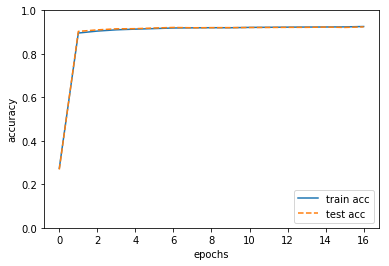

In [15]:
TrainNeuralNet(x_train=x_train, t_train=t_train, x_test=x_test, t_test=t_test)

## 考察

ふむぅ、単層でもある程度の認識精度が出ている。  
そもそも単純に分離できちゃう問題なのかな？  
数字認識程度ならハミング距離を使ったK-NNでもある程度の認識精度が出せそうだし、  
あまり層やパラメータを変えて考察する対象としては良くないのかもしれない。